In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
#! pip install dabl
import dabl
df = pd.read_csv("challenge_1_gut_microbiome_data.csv")
df

/usr/local/lib/python3.9/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


,Unnamed: 0,Bacteria-1,Bacteria-2,Bacteria-3,Bacteria-4,Bacteria-5,Bacteria-6,Bacteria-7,Bacteria-8,Bacteria-9,...,Bacteria-1086,Bacteria-1087,Bacteria-1088,Bacteria-1089,Bacteria-1090,Bacteria-1091,Bacteria-1092,Bacteria-1093,Bacteria-1094,disease
0,Sample-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Disease-2
1,Sample-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,17111.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Disease-2
2,Sample-3,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,214.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Disease-2
3,Sample-4,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Disease-2
4,Sample-5,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1932.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,Disease-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7476,Sample-7477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Healthy
7477,Sample-7478,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Healthy
7478,Sample-7479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2831.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Healthy
7479,Sample-7480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Healthy


In [2]:
df.describe()

,Bacteria-1,Bacteria-2,Bacteria-3,Bacteria-4,Bacteria-5,Bacteria-6,Bacteria-7,Bacteria-8,Bacteria-9,Bacteria-10,...,Bacteria-1085,Bacteria-1086,Bacteria-1087,Bacteria-1088,Bacteria-1089,Bacteria-1090,Bacteria-1091,Bacteria-1092,Bacteria-1093,Bacteria-1094
count,7481.000000,7481.000000,7481.000000,7481.000000,7481.000000,7481.000000,7481.000000,7481.00000,7481.000000,7481.000000,...,7481.000000,7481.000000,7481.000000,7481.000000,7481.000000,7481.000000,7481.000000,7481.000000,7481.000000,7481.000000
mean,0.032750,37.562893,2.537495,0.000401,0.000936,0.000668,0.454618,0.04478,0.007218,0.050394,...,0.000535,0.007085,626.869937,0.012699,0.001871,0.005213,0.053068,0.000267,37.886379,0.562224
std,2.719433,404.702666,55.417197,0.034685,0.080932,0.057808,13.035579,1.67340,0.406105,1.022867,...,0.046247,0.612768,2881.775152,1.098358,0.161863,0.450905,3.835730,0.023123,861.540239,18.802489
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,154.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,235.000000,13253.000000,3881.000000,3.000000,7.000000,5.000000,842.000000,103.00000,32.000000,45.000000,...,4.000000,53.000000,79898.000000,95.000000,14.000000,39.000000,328.000000,2.000000,53963.000000,1256.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7481 entries, 0 to 7480
Columns: 1096 entries, Unnamed: 0 to disease
dtypes: float64(1094), object(2)
memory usage: 62.6+ MB


In [4]:
df.isnull().sum()

Unnamed: 0       0
Bacteria-1       0
Bacteria-2       0
Bacteria-3       0
Bacteria-4       0
                ..
Bacteria-1091    0
Bacteria-1092    0
Bacteria-1093    0
Bacteria-1094    0
disease          0
Length: 1096, dtype: int64

In [5]:
df.disease.nunique()

4

In [6]:
df.fillna(method="bfill")

,Unnamed: 0,Bacteria-1,Bacteria-2,Bacteria-3,Bacteria-4,Bacteria-5,Bacteria-6,Bacteria-7,Bacteria-8,Bacteria-9,...,Bacteria-1086,Bacteria-1087,Bacteria-1088,Bacteria-1089,Bacteria-1090,Bacteria-1091,Bacteria-1092,Bacteria-1093,Bacteria-1094,disease
0,Sample-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Disease-2
1,Sample-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,17111.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Disease-2
2,Sample-3,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,214.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Disease-2
3,Sample-4,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Disease-2
4,Sample-5,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1932.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,Disease-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7476,Sample-7477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Healthy
7477,Sample-7478,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Healthy
7478,Sample-7479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2831.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Healthy
7479,Sample-7480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Healthy


### Splitting the numerical features seperately

In [7]:
num_col = [col for col in df.columns if df[col].dtypes != 'object']

df_mean = df[num_col].mean()
df_mean

Bacteria-1        0.032750
Bacteria-2       37.562893
Bacteria-3        2.537495
Bacteria-4        0.000401
Bacteria-5        0.000936
                   ...    
Bacteria-1090     0.005213
Bacteria-1091     0.053068
Bacteria-1092     0.000267
Bacteria-1093    37.886379
Bacteria-1094     0.562224
Length: 1094, dtype: float64

In [8]:
y= df['disease']
X= df.iloc[:,1:-1]

X

,Bacteria-1,Bacteria-2,Bacteria-3,Bacteria-4,Bacteria-5,Bacteria-6,Bacteria-7,Bacteria-8,Bacteria-9,Bacteria-10,...,Bacteria-1085,Bacteria-1086,Bacteria-1087,Bacteria-1088,Bacteria-1089,Bacteria-1090,Bacteria-1091,Bacteria-1092,Bacteria-1093,Bacteria-1094
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,17111.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,214.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1932.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7477,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2831.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Using LabelEncoder on the disease feature

In [9]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

df['disease'] = le.fit_transform(df['disease'])

y = df['disease']

### Portion of EDA using DABL Library {some part was removed to make code cleaner}

Target looks like classification
Showing only top 10 of 220 continuous features


/usr/local/lib/python3.9/dist-packages/dabl/plot/utils.py:632: UserWarning: Dropped 37 outliers in column Bacteria-531.
  warn("Dropped {} outliers in column {}.".format(
/usr/local/lib/python3.9/dist-packages/dabl/plot/utils.py:632: UserWarning: Dropped 38 outliers in column Bacteria-598.
  warn("Dropped {} outliers in column {}.".format(
/usr/local/lib/python3.9/dist-packages/dabl/plot/utils.py:632: UserWarning: Dropped 32 outliers in column Bacteria-140.
  warn("Dropped {} outliers in column {}.".format(
/usr/local/lib/python3.9/dist-packages/dabl/plot/utils.py:632: UserWarning: Dropped 46 outliers in column Bacteria-985.
  warn("Dropped {} outliers in column {}.".format(
/usr/local/lib/python3.9/dist-packages/dabl/plot/utils.py:632: UserWarning: Dropped 35 outliers in column Bacteria-1008.
  warn("Dropped {} outliers in column {}.".format(
/usr/local/lib/python3.9/dist-packages/dabl/plot/utils.py:632: UserWarning: Dropped 30 outliers in column Bacteria-53.
  warn("Dropped {} outlie

Linear Discriminant Analysis training set score: 0.447


[[<Figure size 1440x576 with 10 Axes>,
  <Figure size 1152x288 with 4 Axes>,
  <Figure size 1152x288 with 4 Axes>,
  <Figure size 864x288 with 3 Axes>],
 None]

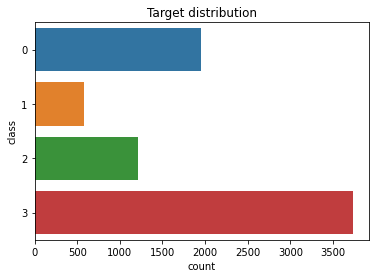

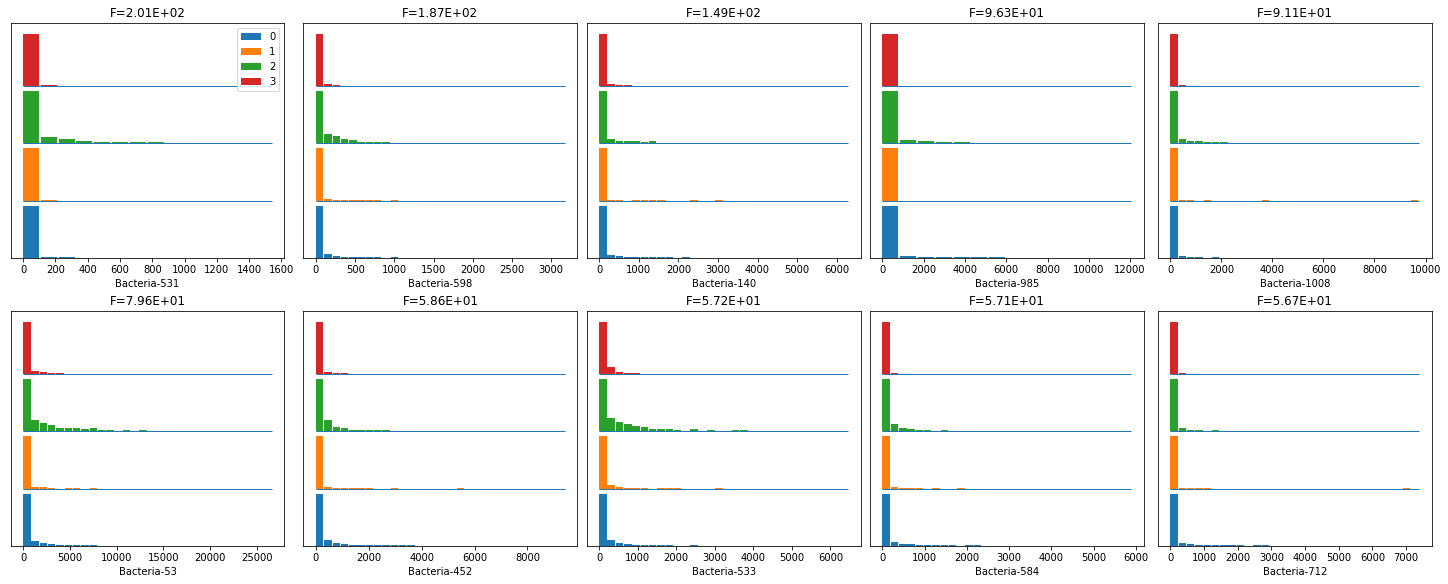

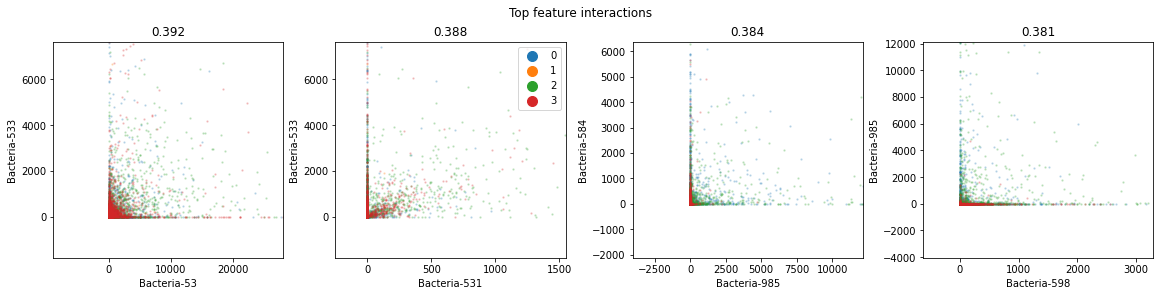

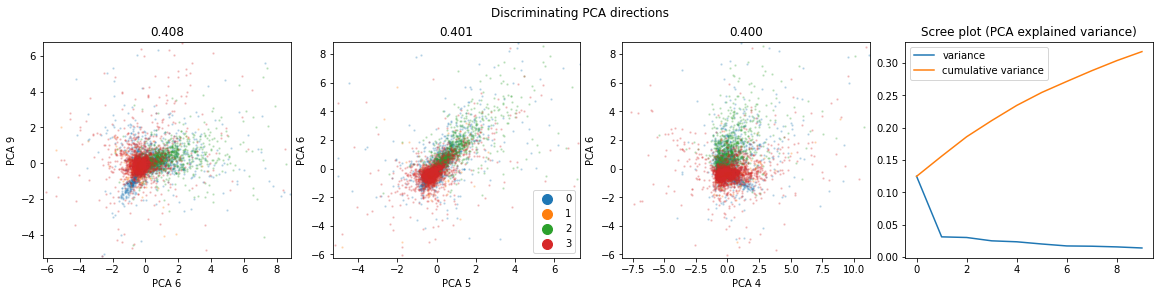

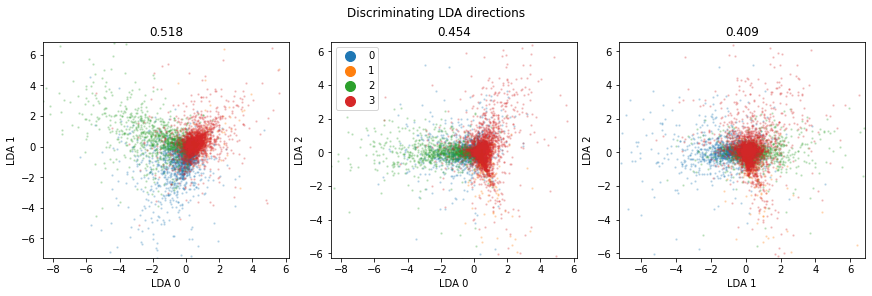

In [10]:
dabl.plot(X,y,verbose=100)

###  Feature Selection using XGBClassifier

In [11]:



from imblearn.ensemble import BalancedRandomForestClassifier
from xgboost import XGBClassifier

clf = XGBClassifier(max_depth = 6, random_state=32)

clf.fit(X, y)

imp = clf.feature_importances_

importances = clf.feature_importances_

sorted_indices = np.argsort(importances)[::-1]

print(X.columns[sorted_indices], sep = "\n")

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:24:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Index(['Bacteria-3', 'Bacteria-345', 'Bacteria-985', 'Bacteria-476',
       'Bacteria-408', 'Bacteria-687', 'Bacteria-209', 'Bacteria-716',
       'Bacteria-615', 'Bacteria-531',
       ...
       'Bacteria-760', 'Bacteria-759', 'Bacteria-758', 'Bacteria-757',
       'Bacteria-756', 'Bacteria-755', 'Bacteria-754', 'Bacteria-752',
       'Bacteria-751', 'Bacteria-1'],
      dtype='object', length=1094)


In [15]:
d = X.columns[sorted_indices]
X_new = df[d[:-200]]

### SMOTE-Tomek link is being used to resample and balance the data

In [16]:



from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE

sme = SMOTETomek(random_state=42)

X_res, y_res = sme.fit_resample(X_new, y)

X_res

,Bacteria-3,Bacteria-345,Bacteria-985,Bacteria-476,Bacteria-408,Bacteria-687,Bacteria-209,Bacteria-716,Bacteria-615,Bacteria-531,...,Bacteria-539,Bacteria-654,Bacteria-652,Bacteria-647,Bacteria-628,Bacteria-620,Bacteria-604,Bacteria-599,Bacteria-597,Bacteria-595
0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,287.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,925.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,2855.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,2114.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,47.0,0.000000,0.000000,0.0,0.0,693.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14841,0.0,0.0,1322.660201,0.0,7.738440,17.215321,0.0,0.0,1349.186459,514.786055,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14842,0.0,0.0,241.242323,0.0,0.000000,0.000000,0.0,0.0,730.993924,105.911051,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14843,0.0,0.0,660.888022,0.0,32.568223,26.409137,0.0,0.0,4174.019998,1598.526737,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14844,0.0,0.0,419.335782,0.0,5.205300,0.000000,0.0,0.0,9435.146650,196.694977,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Splitting the dataset in 70:30 train-test ratio, then using RobustScaler to standardize data

In [17]:


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.3, random_state = 32)


from sklearn.preprocessing import RobustScaler
from pandas import DataFrame

transformation = RobustScaler()
d = transformation.fit(X_train)

X_train = d.transform(X_train)
X_test = d.transform(X_test)
X_train

array([[0.        , 0.        , 0.94451095, ..., 0.        , 0.        ,
        0.        ],
       [6.41500912, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

### Getting a generalized view of the performance of simple algorithms on the cleaned and carved data

In [18]:



classifier = dabl.SimpleClassifier(random_state=0)
classifier.fit(X_train, y_train)

Running DummyClassifier()
accuracy: 0.253 recall_macro: 0.250 precision_macro: 0.063 f1_macro: 0.101
=== new best DummyClassifier() (using recall_macro):
accuracy: 0.253 recall_macro: 0.250 precision_macro: 0.063 f1_macro: 0.101

Running GaussianNB()
accuracy: 0.535 recall_macro: 0.532 precision_macro: 0.556 f1_macro: 0.468
=== new best GaussianNB() (using recall_macro):
accuracy: 0.535 recall_macro: 0.532 precision_macro: 0.556 f1_macro: 0.468

Running MultinomialNB()
accuracy: 0.565 recall_macro: 0.563 precision_macro: 0.579 f1_macro: 0.531
=== new best MultinomialNB() (using recall_macro):
accuracy: 0.565 recall_macro: 0.563 precision_macro: 0.579 f1_macro: 0.531

Running DecisionTreeClassifier(class_weight='balanced', max_depth=1)
accuracy: 0.417 recall_macro: 0.413 precision_macro: 0.249 f1_macro: 0.290
Running DecisionTreeClassifier(class_weight='balanced', max_depth=5)
accuracy: 0.620 recall_macro: 0.619 precision_macro: 0.667 f1_macro: 0.627
=== new best DecisionTreeClassifier(

SimpleClassifier(random_state=0)

#### The main stacked-ensemble model is defined over here.
#### Firstly, the weak learners were individually trained to decide some of their hyper-parameters like max-depth. 
#### Then an StackingClassifier is made using all these weak learners and one meta learner

In [19]:





import pickle as pkl
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb

LGB_Classifier = lgb.LGBMClassifier()
#LGB_Classifier.fit(X_train, y_train)


RF_Classifier = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=6, n_estimators = 200)
#RF_Classifier.fit(X_train, y_train)


XGB_Classifier = XGBClassifier(random_state=42,n_jobs=-1,max_depth=7,n_estimators = 200)
#XGB_Classifier.fit(X_train, y_train)


LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=42)
#LGR_Classifier.fit(X_train, y_train)

KNN_Classifier =  KNeighborsClassifier()

estimators = [LGR_Classifier,XGB_Classifier,RF_Classifier,KNN_Classifier]


from sklearn.ensemble import StackingClassifier


estimators = [
     ('rf', RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=6, n_estimators = 200)),
     ('xgb', XGBClassifier(random_state=42,n_jobs=-1,max_depth=7,n_estimators = 200)),
     ('lgr',LogisticRegression(n_jobs=-1, random_state=42)),
     ('knn', KNeighborsClassifier())
]


clff = StackingClassifier(estimators=estimators, final_estimator=lgb.LGBMClassifier())

In [20]:
clff.fit(X_train, y_train).score(X_test, y_test)

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:29:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:33:26] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:36:18] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:39:23] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:42:06] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:44:47] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9355635383924562

### Evaluation of the kappa score and F-1 Score

In [21]:
y_pred = clff.predict(X_test)

from sklearn.metrics import f1_score, cohen_kappa_score, confusion_matrix

f1 = f1_score(y_test, y_pred, average="micro")
cohen_kappa = cohen_kappa_score(y_test, y_pred)
#quad_kappa = kappa(y_test, y_pred, weights='quadratic')

print(f1)
print(cohen_kappa)

0.9355635383924562
0.914077083388647


In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1137
           1       0.97      0.94      0.95      1102
           2       0.95      0.94      0.94      1099
           3       0.89      0.93      0.91      1116

    accuracy                           0.94      4454
   macro avg       0.94      0.94      0.94      4454
weighted avg       0.94      0.94      0.94      4454

